# RadiusNeighborsClassifier with Scale & Quantile Transformer 


This Code template is for the Classification task using a simple Radius Neighbor Classifier with separate feature scaling using Scale pipelining Quantile Transformer  which is a feature transformation technique. It implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user. 

### Required Packages

In [1]:
!pip install imblearn

In [2]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se 
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder,scale,QuantileTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Initialization

Filepath of CSV file

In [3]:
#filepath
file_path= ""

List of features which are  required for model training .

In [4]:
#x_values
features=[]

Target feature for prediction.

In [5]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv(file_path)
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [7]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [8]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [9]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

Age  EstimatedSalary  Gender_Female  Gender_Male
0   19            19000              0            1
1   35            20000              0            1
2   26            43000              1            0
3   27            57000              1            0
4   19            76000              0            1

#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

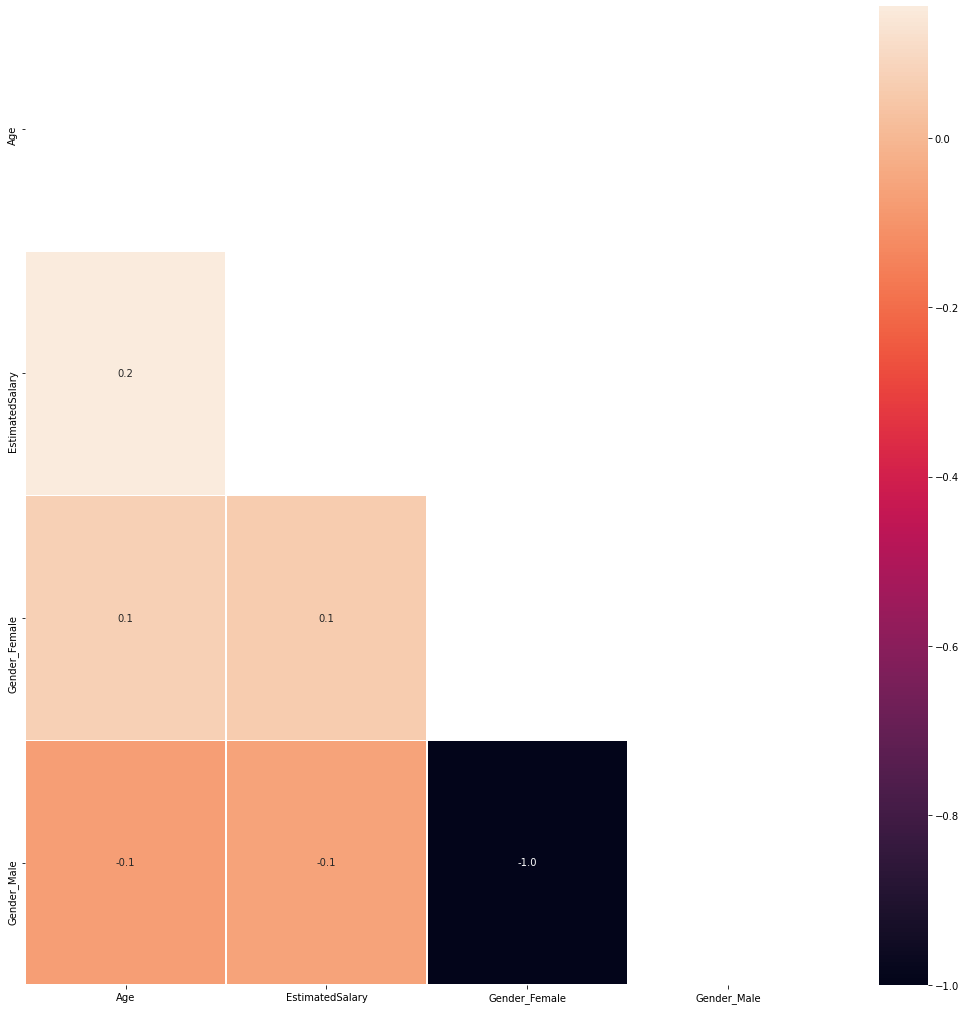

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

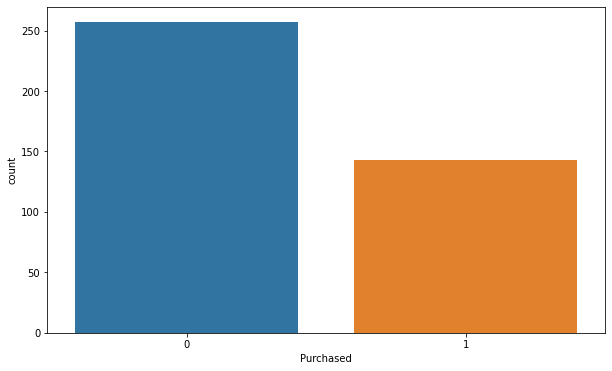

In [11]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Rescaling
<Code>scale</Code> standardizes a dataset along any axis. It standardizes features by removing the mean and scaling to unit variance.

scale is similar to <Code>StandardScaler</Code> in terms of feature transformation, but unlike StandardScaler, it lacks Transformer API i.e., it does not have <Code>fit_transform</Code>, <Code>transform</Code> and other related methods.

In [12]:
X_Scaled = scale(X)
X_Scaled=pd.DataFrame(X_Scaled,columns=X.columns)
X_Scaled.head()

Age  EstimatedSalary  Gender_Female  Gender_Male
0 -1.781797        -1.490046      -1.020204     1.020204
1 -0.253587        -1.460681      -1.020204     1.020204
2 -1.113206        -0.785290       0.980196    -0.980196
3 -1.017692        -0.374182       0.980196    -0.980196
4 -1.781797         0.183751      -1.020204     1.020204

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.2,random_state=123)

#### Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library. 

In [14]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

### Feature Transformation

QuantileTransformer transforms features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.The transformation is applied on each feature independently. 


##### For more information on QuantileTransformer [ click here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)

### Model

RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius  of each training point, where  is a floating-point value specified by the user.
In cases where the data is not uniformly sampled, radius-based neighbors classification can be a better choice.

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html) for parameters

In [15]:
# Build Model here
# Change outlier_label as per specific use-case
model=make_pipeline(QuantileTransformer(),RadiusNeighborsClassifier(n_jobs=-1, outlier_label='most_frequent'))
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='uniform',
                                     random_state=None, subsample=100000)),
                ('radiusneighborsclassifier',
                 RadiusNeighborsClassifier(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=-1,
                                           outlier_label='most_frequent', p=2,
                                           radius=1.0, weights='uniform'))],
         verbose=False)

#### Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [16]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 47.50 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

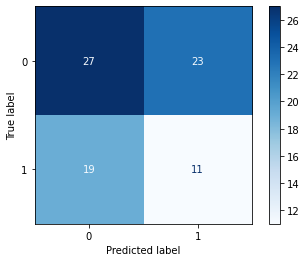

In [17]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [18]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.59      0.54      0.56        50
           1       0.32      0.37      0.34        30

    accuracy                           0.48        80
   macro avg       0.46      0.45      0.45        80
weighted avg       0.49      0.47      0.48        80



#### Creator: Ganapathi Thota , Github: [Profile](https://github.com/Shikiz)